<a href="https://www.kaggle.com/code/absndus/data-science-portfolio-healthcare-and-boxplots?scriptVersionId=136050910" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Science Portfolio - Understanding Healthcare Using Boxplots Notebook ##

### Created by: Albert Schultz ###

### Date Created: 07/07/2023 ###

### Version: 1.00 ###

### Executive Summary ###
In this notebook, I will be using the boxplots visuals to investigate the way hospitals in various states across the United States charge their patients for medical procedures. 

## Table of Contents ##

1. [Introduction](#1.-Introduction)
2. [Vision and Goals](#2.-Vision-and-Goals)
3. [Load the Healthcare Dataset from US Health and Human Services (HHS)](#3.-Load-the-Healthcare-Dataset-from-US-Health-and-Human-Services-(HHS))
4. [Perform Transformation of the Dataframe](#4.-Perform-Transformation-of-the-Dataframe)
5. [Perform EDA on the Cleaned Dataset](#5.-Perform-EDA-on-the-Cleaned-Dataset)

## 1. Introduction ##

This section imports the required library modules needed for this lab notebook.

**Initialize the Notebook for data access, import library modules, and set the working directory for this project.**

In [101]:
import pandas as pd #For statistical data analysis. 
import numpy as np #For statistical analysis using various statistical functions. 
from matplotlib import pyplot as plt #For plotting advance graphs and boxplots. 
import json
import matplotlib.ticker as mtick
import requests
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cms-hc-impatient-dataset-2020-to-2021/MUP_IHP_RY23_P03_V10_DY21_PRVSVC2.csv


## 2. Vision and Goals ##

The vision is to make sense of the impatient dataset via boxplots and distribution charts (histograms) to view insights of the CMS Healthcare Impatient dataset. 

**Vision:** To understand the aspects and make meaningful insights of the CMS Impatient Healthcare dataset. 

**Goals:** 
1. Pull and review the dataset from 2020 to 2021 Impatient Healthcare of Hospital dataset via the US HHS datasets dashboard. 
2. Review for missing data and mismatch columns. 
3. Perform ETL when needed to make the dataframe more clean for ease of EDA. 
4. Perform EDA. 
5. Create boxplot and distribution histograms. 

## 3. Load the Healthcare Dataset from US Health and Human Services (HHS) ##

This section goes over the process of loading the large US HHS csv file into this notebook. Also, I will be going through the dataset for review to get acquainted with the dataset that tells the story of various hospital that charges patients.

1. Import the healthcare from the United States Health and Human Services (HSS) department for year 2020 to 2021. 

In [102]:
healthcare = pd.read_csv('/kaggle/input/cms-hc-impatient-dataset-2020-to-2021/MUP_IHP_RY23_P03_V10_DY21_PRVSVC2.csv')

2. Print the first five rows. 

In [103]:
healthcare.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.400000,36794.266667,33141.400000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.125000,26893.937500,22705.687500
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,20,192609.900000,31374.650000,27815.600000
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,18,112215.666670,12354.777778,8848.666667
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,43,89606.953488,8284.186047,6182.697674


3. Print out the dtypes of the columns to view the columns. 

In [104]:
healthcare.dtypes

Rndrng_Prvdr_CCN               int64
Rndrng_Prvdr_Org_Name         object
Rndrng_Prvdr_City             object
Rndrng_Prvdr_St               object
Rndrng_Prvdr_State_FIPS        int64
Rndrng_Prvdr_Zip5              int64
Rndrng_Prvdr_State_Abrvtn     object
Rndrng_Prvdr_RUCA            float64
Rndrng_Prvdr_RUCA_Desc        object
DRG_Cd                         int64
DRG_Desc                      object
Tot_Dschrgs                    int64
Avg_Submtd_Cvrd_Chrg         float64
Avg_Tot_Pymt_Amt             float64
Avg_Mdcr_Pymt_Amt            float64
dtype: object

**Dataset Summary:** All of the table columns are set to strings data type. I would need to convert payments and billing columns into float instead of leaving them as strings. 

4. rint out the information about the healthcare dataframe. 

In [105]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151989 entries, 0 to 151988
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           151989 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      151989 non-null  object 
 2   Rndrng_Prvdr_City          151989 non-null  object 
 3   Rndrng_Prvdr_St            151989 non-null  object 
 4   Rndrng_Prvdr_State_FIPS    151989 non-null  int64  
 5   Rndrng_Prvdr_Zip5          151989 non-null  int64  
 6   Rndrng_Prvdr_State_Abrvtn  151989 non-null  object 
 7   Rndrng_Prvdr_RUCA          151989 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     151989 non-null  object 
 9   DRG_Cd                     151989 non-null  int64  
 10  DRG_Desc                   151989 non-null  object 
 11  Tot_Dschrgs                151989 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg       151989 non-null  float64
 13  Avg_Tot_Pymt_Amt           15

**Dataset Summary:** The columns do not have missing data. However, it doesn't mean that the values are considered empty. They may have 'n/a' as a placeholder as well. 

## 4. Perform Transformation of the Dataframe ##

In this section, I go over the process to convert some columns into proper datatype to perform EDA much easier. 

1. Lower case the columns to meet the dataframe standards. 

In [106]:
healthcare.columns = map(str.lower, healthcare.columns)
healthcare.head()

,rndrng_prvdr_ccn,rndrng_prvdr_org_name,rndrng_prvdr_city,rndrng_prvdr_st,rndrng_prvdr_state_fips,rndrng_prvdr_zip5,rndrng_prvdr_state_abrvtn,rndrng_prvdr_ruca,rndrng_prvdr_ruca_desc,drg_cd,drg_desc,tot_dschrgs,avg_submtd_cvrd_chrg,avg_tot_pymt_amt,avg_mdcr_pymt_amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.400000,36794.266667,33141.400000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.125000,26893.937500,22705.687500
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,20,192609.900000,31374.650000,27815.600000
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,18,112215.666670,12354.777778,8848.666667
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,43,89606.953488,8284.186047,6182.697674


2. Change the columns **tot_dschrgs, avg_submtd_cvrd_chrg, avg_tot_pymt_amt, avg_mdcr_pymt_amt** from object to float.

In [107]:
#Convert last several columns of the healthcare dataframe from object to numeric.
healthcare['tot_dschrgs'] = pd.to_numeric(healthcare['tot_dschrgs'], errors = 'coerce')
healthcare['avg_submtd_cvrd_chrg'] = pd.to_numeric(healthcare['avg_submtd_cvrd_chrg'], errors = 'coerce')
healthcare['avg_tot_pymt_amt'] = pd.to_numeric(healthcare['avg_tot_pymt_amt'], errors = 'coerce')
healthcare['avg_mdcr_pymt_amt'] = pd.to_numeric(healthcare['avg_mdcr_pymt_amt'], errors = 'coerce')
healthcare['drg_cd'] = pd.to_numeric(healthcare['drg_cd'], errors = 'coerce')
healthcare.dtypes

rndrng_prvdr_ccn               int64
rndrng_prvdr_org_name         object
rndrng_prvdr_city             object
rndrng_prvdr_st               object
rndrng_prvdr_state_fips        int64
rndrng_prvdr_zip5              int64
rndrng_prvdr_state_abrvtn     object
rndrng_prvdr_ruca            float64
rndrng_prvdr_ruca_desc        object
drg_cd                         int64
drg_desc                      object
tot_dschrgs                    int64
avg_submtd_cvrd_chrg         float64
avg_tot_pymt_amt             float64
avg_mdcr_pymt_amt            float64
dtype: object

3. Print the first five rows of the updated healthcare dataframe.

In [108]:
healthcare.head()

,rndrng_prvdr_ccn,rndrng_prvdr_org_name,rndrng_prvdr_city,rndrng_prvdr_st,rndrng_prvdr_state_fips,rndrng_prvdr_zip5,rndrng_prvdr_state_abrvtn,rndrng_prvdr_ruca,rndrng_prvdr_ruca_desc,drg_cd,drg_desc,tot_dschrgs,avg_submtd_cvrd_chrg,avg_tot_pymt_amt,avg_mdcr_pymt_amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.400000,36794.266667,33141.400000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.125000,26893.937500,22705.687500
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,20,192609.900000,31374.650000,27815.600000
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,18,112215.666670,12354.777778,8848.666667
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,43,89606.953488,8284.186047,6182.697674


4. Resize the decimal places for payments to two decimal points for the payments amount columns. 

In [109]:
healthcare[['avg_submtd_cvrd_chrg', 'avg_tot_pymt_amt', 'avg_mdcr_pymt_amt']] = healthcare[['avg_submtd_cvrd_chrg', 'avg_tot_pymt_amt', 'avg_mdcr_pymt_amt']].round(2)

5. Create a new variable called **healthcare_diagnosis** that only contains unique diagnosis from the healthcare dataset.

In [110]:
healthcare_diagnosis = healthcare['drg_desc'].unique()

6. Create a new variable called **chest_pain_diag_healthcare** that contains just the numbers of 'CHEST PAIN' values. 

In [111]:
chest_pain_diag_healthcare = healthcare.loc[healthcare['drg_desc'].str.startswith('CHEST')]
chest_pain_diag_healthcare

,rndrng_prvdr_ccn,rndrng_prvdr_org_name,rndrng_prvdr_city,rndrng_prvdr_st,rndrng_prvdr_state_fips,rndrng_prvdr_zip5,rndrng_prvdr_state_abrvtn,rndrng_prvdr_ruca,rndrng_prvdr_ruca_desc,drg_cd,drg_desc,tot_dschrgs,avg_submtd_cvrd_chrg,avg_tot_pymt_amt,avg_mdcr_pymt_amt
51,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,30,16871.40,5644.30,3832.80
253,10011,St Vincent's East,Birmingham,50 Medical Park East Drive,1,35235,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,15,22035.80,6315.40,4760.93
430,10023,Baptist Medical Center South,Montgomery,2105 East South Boulevard,1,36116,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,15,19577.13,6202.00,4840.53
495,10024,Jackson Hospital & Clinic Inc,Montgomery,1725 Pine Street,1,36106,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,20,13164.05,5127.20,3313.20
567,10029,East Alabama Medical Center,Opelika,2000 Pepperell Parkway,1,36801,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,11,13352.18,5224.64,3942.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150191,520138,Aurora St Lukes Medical Center,Milwaukee,2900 W Oklahoma Ave,55,53215,WI,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,21,39331.95,6275.29,4360.95
150437,520177,Froedtert Memorial Lutheran Hospital,Milwaukee,9200 W Wisconsin Ave,55,53226,WI,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,28,27898.39,7603.50,5457.75
151367,670055,Methodist Hospital Stone Oak,San Antonio,"1139 E Sonterra Blvd,",48,78258,TX,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,13,35984.54,4717.77,3462.08
151590,670077,Houston Methodist West Hospital,Houston,18500 Katy Freeway,48,77094,TX,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,11,29590.91,6638.55,5154.55


7. Separate the chst pain filtered dataset into the providers' state in **AL for Alabama**. 

In [112]:
alabam_chest_pain = chest_pain_diag_healthcare[chest_pain_diag_healthcare['rndrng_prvdr_state_abrvtn'] == 'AL']
alabam_chest_pain

,rndrng_prvdr_ccn,rndrng_prvdr_org_name,rndrng_prvdr_city,rndrng_prvdr_st,rndrng_prvdr_state_fips,rndrng_prvdr_zip5,rndrng_prvdr_state_abrvtn,rndrng_prvdr_ruca,rndrng_prvdr_ruca_desc,drg_cd,drg_desc,tot_dschrgs,avg_submtd_cvrd_chrg,avg_tot_pymt_amt,avg_mdcr_pymt_amt
51,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,30,16871.40,5644.30,3832.80
253,10011,St Vincent's East,Birmingham,50 Medical Park East Drive,1,35235,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,15,22035.80,6315.40,4760.93
430,10023,Baptist Medical Center South,Montgomery,2105 East South Boulevard,1,36116,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,15,19577.13,6202.00,4840.53
495,10024,Jackson Hospital & Clinic Inc,Montgomery,1725 Pine Street,1,36106,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,20,13164.05,5127.20,3313.20
567,10029,East Alabama Medical Center,Opelika,2000 Pepperell Parkway,1,36801,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,11,13352.18,5224.64,3942.64
699,10033,University Of Alabama Hospital,Birmingham,619 South 19th Street,1,35233,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,17,24594.29,8933.24,6320.35
860,10035,Cullman Regional Medical Center,Cullman,1912 Alabama Highway 157,1,35058,AL,5.0,Micropolitan high commuting: primary flow 30% ...,313,CHEST PAIN,14,21770.43,5348.07,4078.21
1004,10039,Huntsville Hospital,Huntsville,101 Sivley Rd,1,35801,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,26,19632.50,5682.27,4364.58
1142,10040,Gadsden Regional Medical Center,Gadsden,1007 Goodyear Avenue,1,35903,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,28,62190.14,5054.32,3826.00
1196,10046,Riverview Regional Medical Center,Gadsden,600 South Third Street,1,35901,AL,1.0,Metropolitan area core: primary flow within an...,313,CHEST PAIN,28,33183.54,4699.25,3586.25


8. Create a variable **costs** to store the Alabama chest pain dataset. 

In [113]:
al_costs = chest_pain_diag_healthcare['avg_submtd_cvrd_chrg'].values

9. Create dataframes for the state 

In [114]:
diabetes_diag_healthcare = healthcare.loc[healthcare['drg_desc'].str.startswith('DIABETES')] #Filter by starting word DIABETES. 
nodak_diabetes = diabetes_diag_healthcare[diabetes_diag_healthcare['rndrng_prvdr_state_abrvtn'] == 'ND'] #Filter out by state of North Dakota. 
nodak_chestpain = chest_pain_diag_healthcare[chest_pain_diag_healthcare['rndrng_prvdr_state_abrvtn'] == 'ND'] #Filter out by state of North Dakota

## 5. Perform EDA on the Cleaned Dataset ##

In this section, I go over the EDA of the cleaned healthcare dataset along with the new dataframes created. 

1. Create a boxplot of the **costs** of the North Dakota healthcare covered cost for chest pains. 

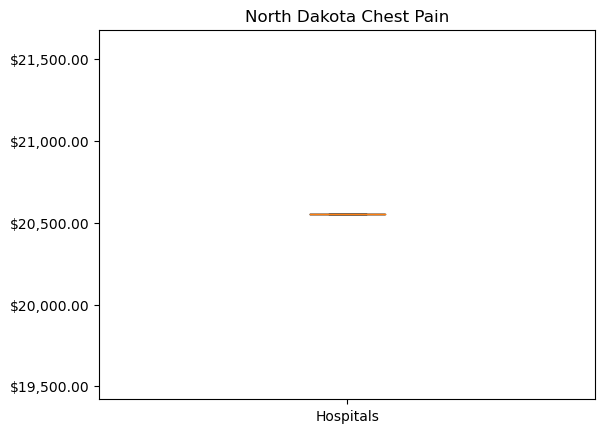

<Figure size 640x480 with 0 Axes>

In [115]:
fig, ax = plt.subplots()
ax.boxplot(nodak_chestpain['avg_submtd_cvrd_chrg'], labels = ['Hospitals'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.title('North Dakota Chest Pain')
plt.show()
plt.clf()

**Visual Summary:** There were lower amounts of chest pain in North Dakota than other states. 

2. Create a boxplot for **chest pain** average covered costs for all states to see which providers in those states have low to highest covered costs from 2020 to 2021.  

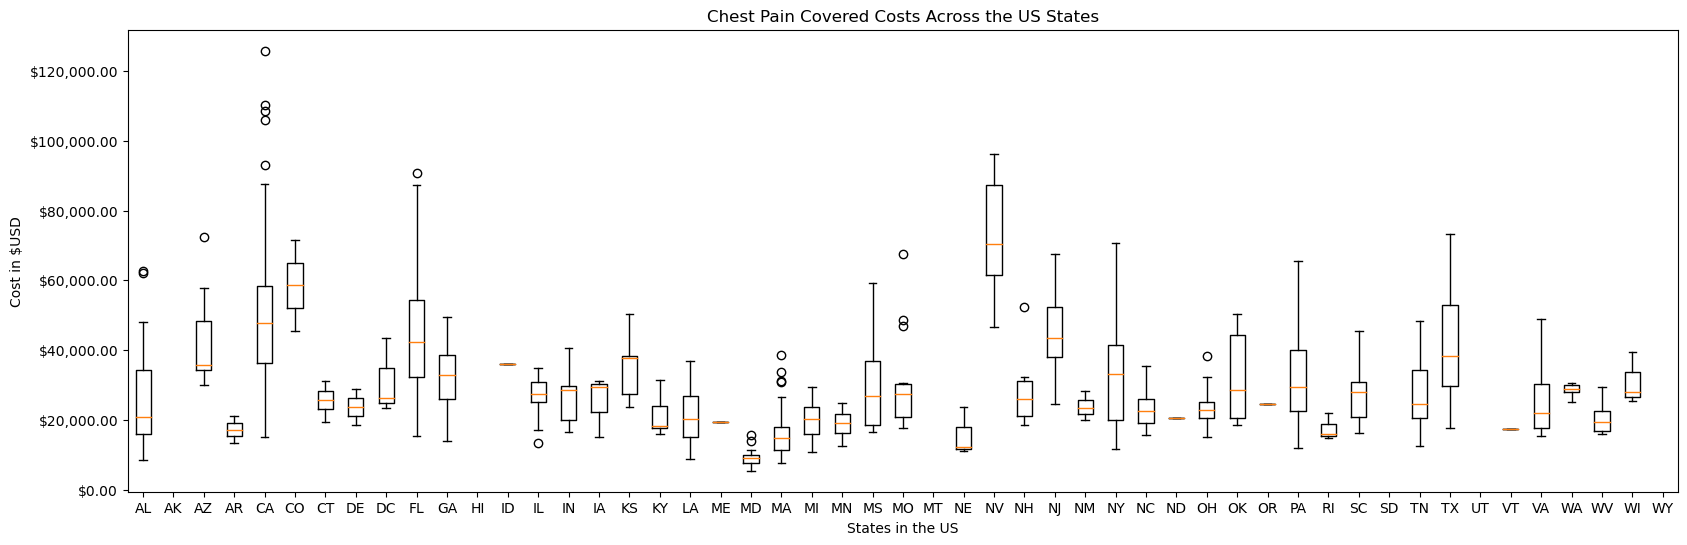

<Figure size 640x480 with 0 Axes>

In [116]:
#Get the state level unique data about all of the diagnosis. 
states = healthcare["rndrng_prvdr_state_abrvtn"].unique()

#Use the for loop to separate the dataset into a dataset for each state. 
datasets = []
for state in states:
    datasets.append(chest_pain_diag_healthcare[chest_pain_diag_healthcare['rndrng_prvdr_state_abrvtn'] == state]['avg_submtd_cvrd_chrg'].values)
    
#Plot 50 box plots of the average covered charge from various diagnosis. 
fig, ax = plt.subplots(figsize = (20, 6))
ax.boxplot(datasets, labels = states)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.title('Chest Pain Covered Costs Across the US States')
plt.xlabel('States in the US')
plt.ylabel('Cost in $USD')
plt.show()
plt.clf()

**Visual Summary:** California has quite a few outliers than any other states when it comes to covered cost for chest pains. 

3. Create a boxplot to view the North Dakota state information about the diabetes related costs data to see the covered costs across NoDak. 

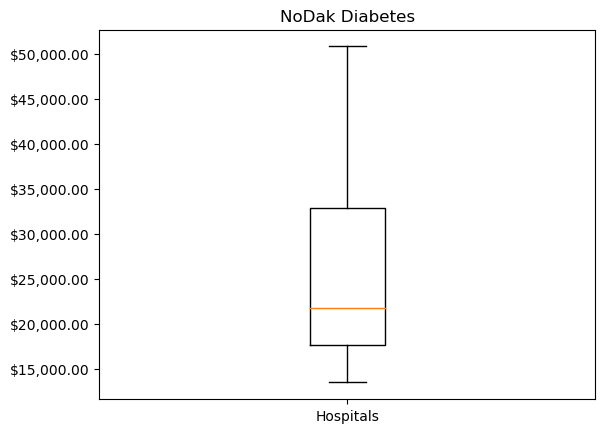

<Figure size 640x480 with 0 Axes>

In [117]:
fig, ax = plt.subplots()
ax.boxplot(nodak_diabetes['avg_submtd_cvrd_chrg'], labels = ['Hospitals'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.title('NoDak Diabetes')
plt.show()
plt.clf()

**Visual Summary:** Throughout North Dakota, there were more diabetes related covered costs than chest pain in North Dakota. 

4. Create a boxplot for **diabetes** related costs that were covered between year 2020 to 2021 for all of the states in the United States. 

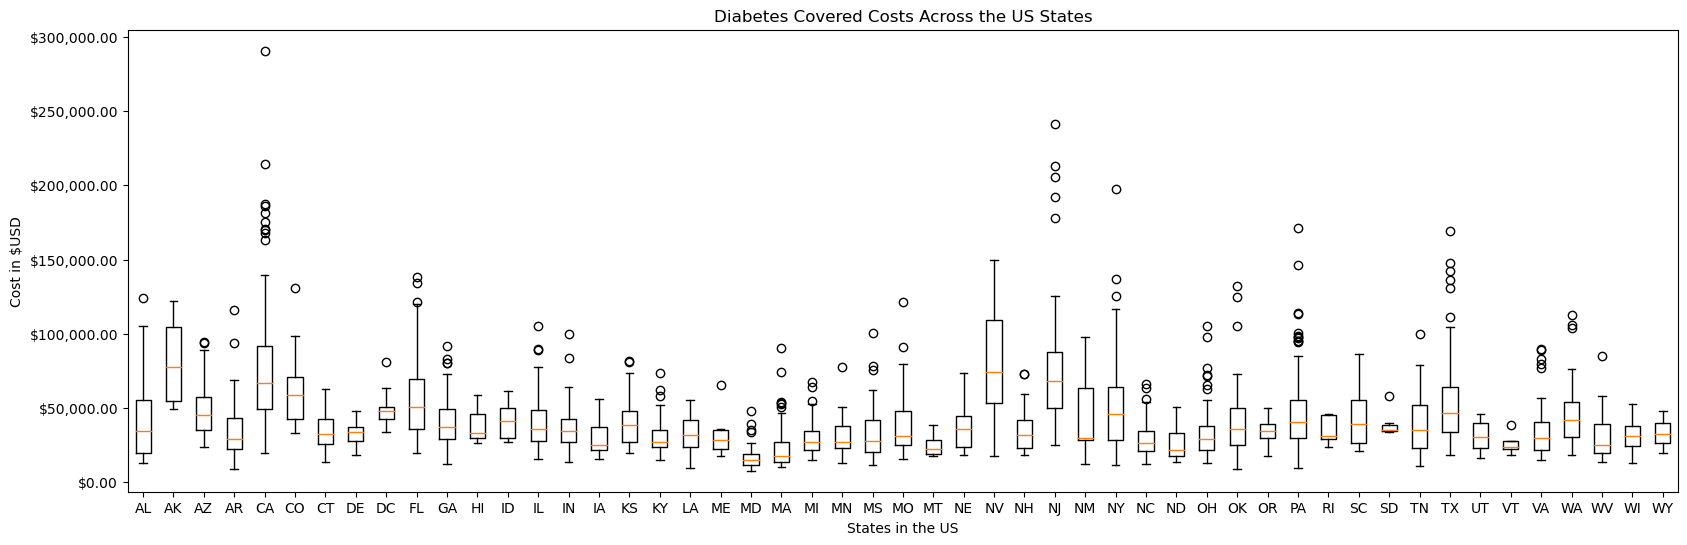

<Figure size 640x480 with 0 Axes>

In [118]:
#Get the state level unique data about all of the diagnosis. 
states = healthcare["rndrng_prvdr_state_abrvtn"].unique()

#Use the for loop to separate the dataset into a dataset for each state. 
datasets = []
for state in states:
    datasets.append(diabetes_diag_healthcare[diabetes_diag_healthcare['rndrng_prvdr_state_abrvtn'] == state]['avg_submtd_cvrd_chrg'].values)
    
#Plot 50 box plots of the average covered charge from various diagnosis. 
fig, ax = plt.subplots(figsize = (20, 6))
ax.boxplot(datasets, labels = states)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.title('Diabetes Covered Costs Across the US States')
plt.xlabel('States in the US')
plt.ylabel('Cost in $USD')
plt.show()
plt.clf()

**Visual Summary:** As you can see, diabetes is one of the major factor in the US for health related surgeries and diagnosis in the US. 

## Summary ##

This project notebook heavily went over the process of reviewing boxplots and how to read boxplots to understand the CMS healthcare inpatient hospital dataset. This dataset from 2020 to 2021 can be explored further if you wish. Feel free to copy and edit the notebook in your own Kaggle environment. 